In [26]:
import pandas as pd
from pandas import Series, DataFrame

In [27]:
titanic_df = pd.read_csv('train.csv')

In [28]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [7]:
#The basic questions to be answered:
#1. Who were the passaengers on the Titanic( Age, Gender, Class etc)
#2. What deck were the passengers on and how does it relate to their class?
#3. Where did the passengers come from?
#4. Who was alone and who was with family
#5. What factors helped someone survive the sinking


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

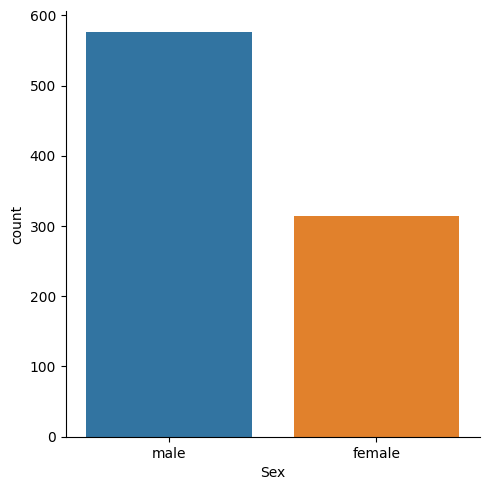

In [92]:
#To check the genders on board
sns.catplot(x='Sex', data=titanic_df, kind='count')

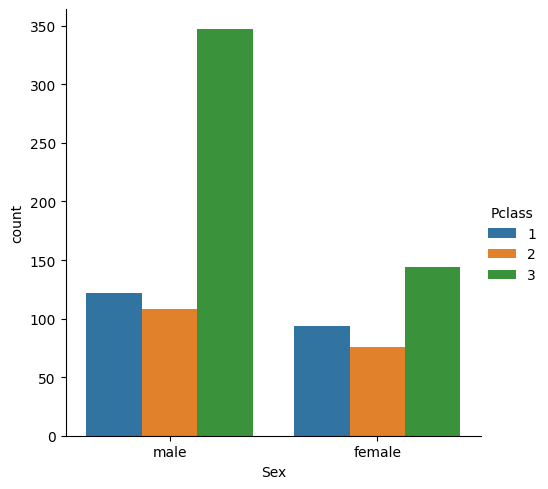

In [72]:
#the new name for factorplot is catplot

sns.catplot(x='Sex', data=titanic_df, hue='Pclass', kind='count')

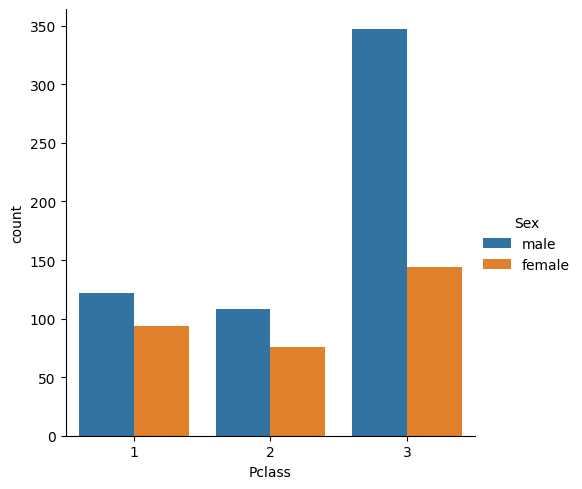

In [71]:
sns.catplot(x="Pclass", data=titanic_df, hue="Sex", kind='count')

In [8]:
#Creating a function
def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [33]:
#To apply the function created above to the new column(person)created we use this method;

titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis=1)

In [34]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


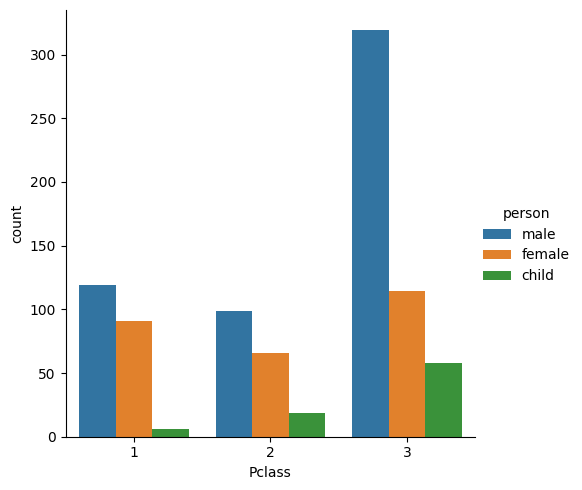

In [69]:
sns.catplot(x="Pclass", data=titanic_df, hue="person", kind='count')

<AxesSubplot:>

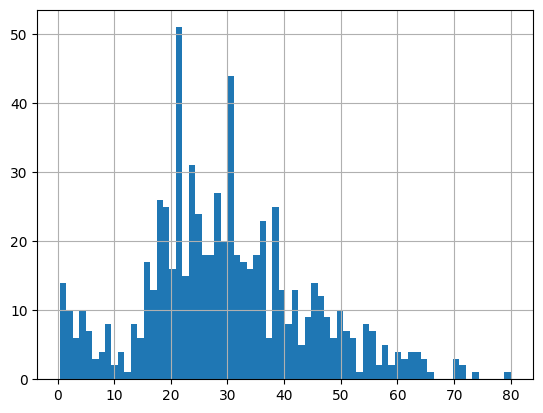

In [35]:
#To view the age
titanic_df['Age'].hist(bins=70)

In [36]:
#To determine the mean of the age
titanic_df['Age'].mean()

29.69911764705882

In [19]:
#To determine the total individual ages of everyone onboard we use value counts
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

In [37]:
Male= titanic_df.loc[titanic_df['person']==('male')].count()[0]
Male

537

In [38]:
Female= titanic_df.loc[titanic_df['person']==('female')].count()[0]
Female

271

In [39]:
Children= titanic_df.loc[titanic_df['person']==('child')].count()[0]
Children

83

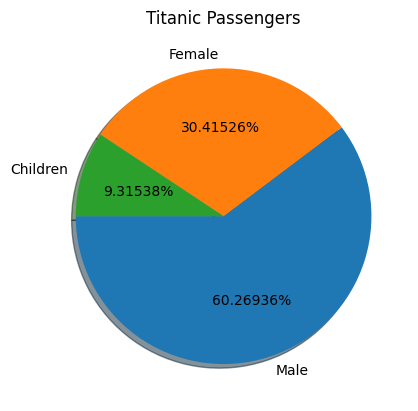

In [52]:
#Create a piechart showing the ratio of males, females and children onboard
label= ['Male', 'Female', 'Children']
plt.pie([Male, Female, Children], labels=label, autopct='%1.5f%%', shadow=True, startangle=180)
plt.title('Titanic Passengers')
plt.show()

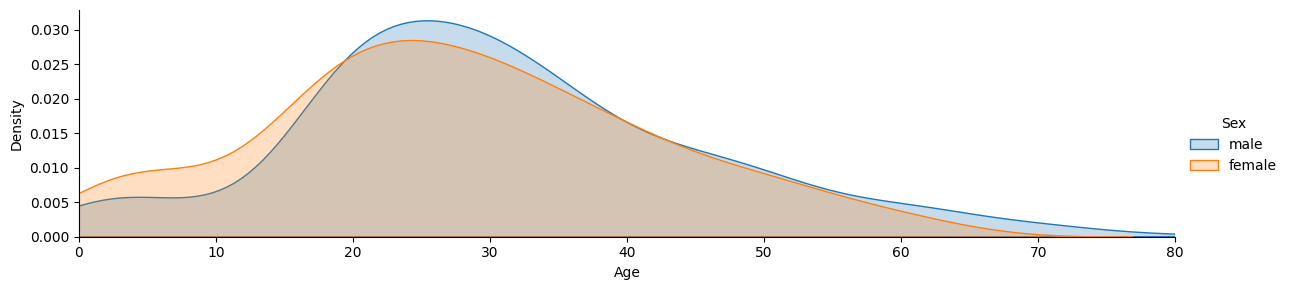

In [39]:
#Creating a KDE plot(Age distribution for the male and female onboard)
#NB; Shade is depicted as fill in newer version of python,

fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=4)

fig.map(sns.kdeplot, 'Age', fill=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

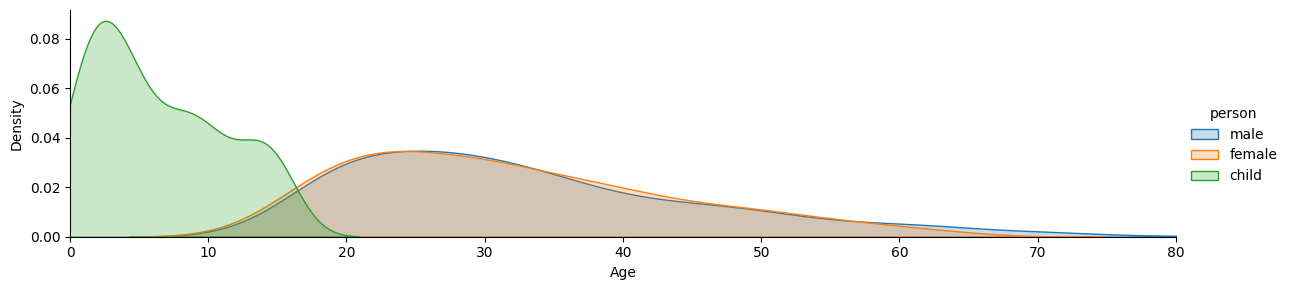

In [40]:
#To create the age distribution of everyone onboard including the children;

fig = sns.FacetGrid(titanic_df, hue='person', aspect=4)

fig.map(sns.kdeplot, 'Age', fill=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

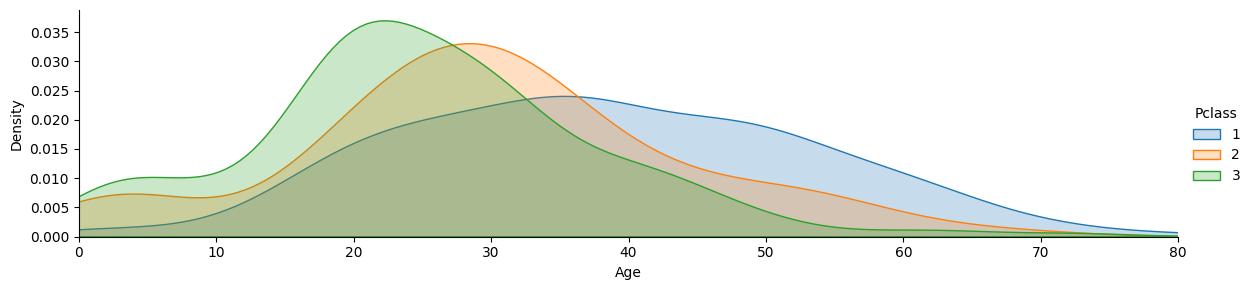

In [43]:
#To check the age distribution based on class;

fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)

fig.map(sns.kdeplot, 'Age', fill=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

In [44]:
#Question 2 solution

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [123]:
#focusing on the cabin column, inorder to remove all te NaN value(null values);

deck = titanic_df['Cabin'].dropna()

In [124]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [125]:
#To remove the numbers from the cabin name and also plot a chart; using a for loop;

levels = []

for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels)

cabin_df.columns = ['Cabin']



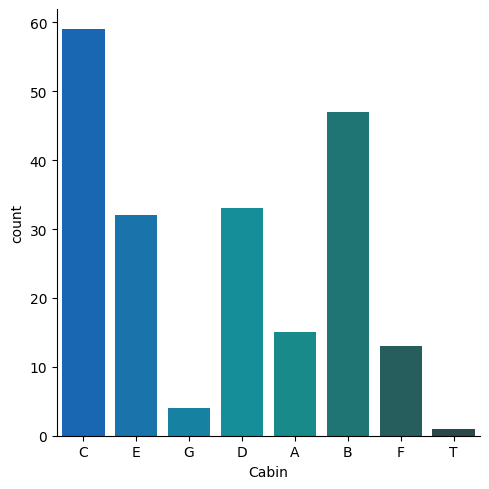

In [83]:
sns.catplot(x='Cabin', data=cabin_df, palette='winter_d', kind='count')

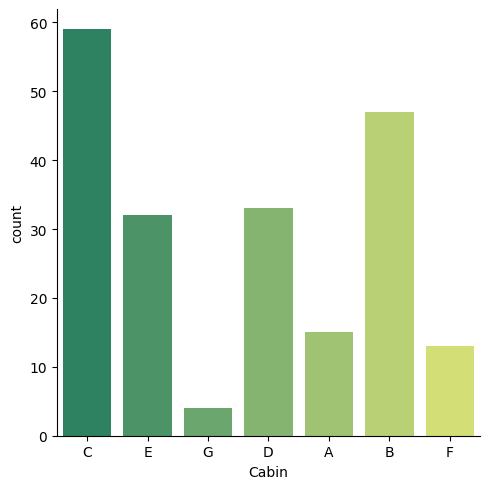

In [85]:
#To remove the T column;

cabin_df = cabin_df[cabin_df.Cabin != 'T']

sns.catplot(x='Cabin', data=cabin_df, palette='summer', kind='count')

In [86]:
#Question 3

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


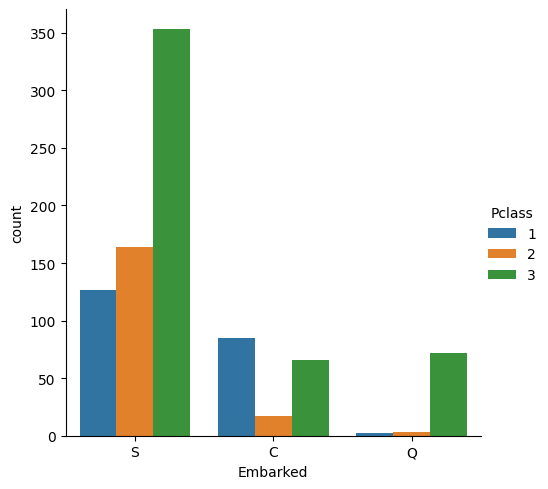

In [91]:
sns.catplot(x='Embarked', data=titanic_df, hue='Pclass', kind='count')

In [93]:
#Question 4
#SibSp means they have a sibling onboard
#Parch means they have a parent or child onboard

#To create a new column for people alone;

titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch


In [95]:
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [96]:
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'

titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [97]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


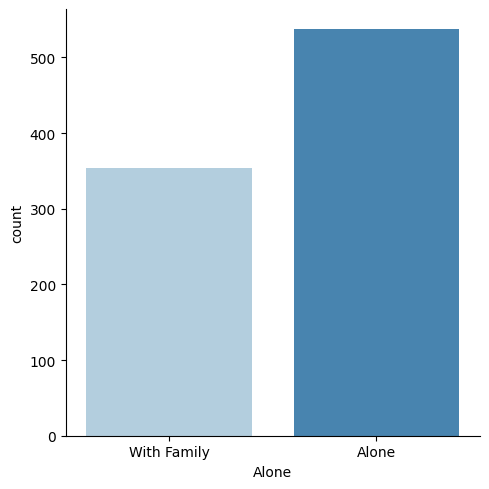

In [99]:
#To check the amount of people that were alone or with family;

sns.catplot(x='Alone', data=titanic_df, palette='Blues', kind='count')

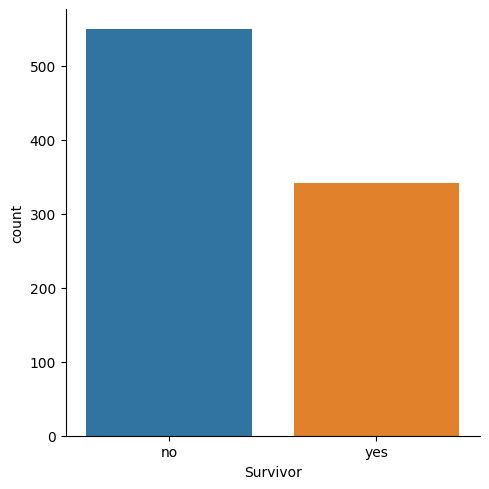

In [100]:
#To check for survivors;

titanic_df['Survivor'] = titanic_df.Survived.map({0:'no', 1:'yes'})
sns.catplot(x='Survivor', data=titanic_df, kind='count')

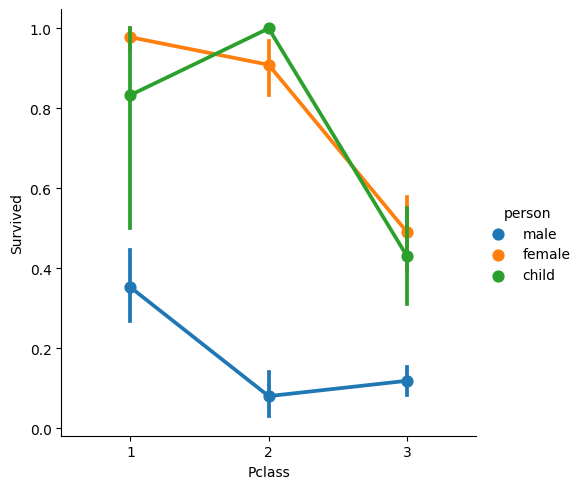

In [114]:
#Survivor rate based on class;

sns.catplot(x='Pclass', y='Survived', data=titanic_df, hue='person', kind='point')

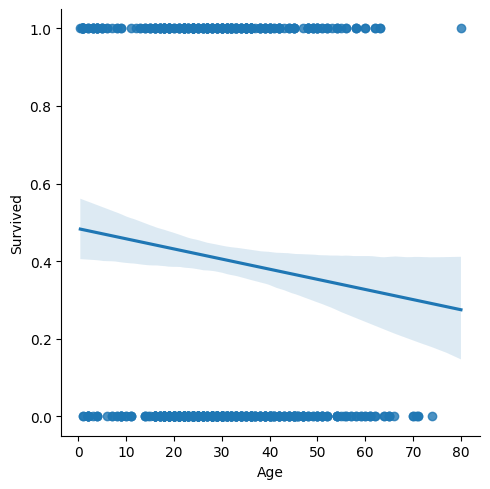

In [115]:
#To check the rate of survivors based on age;

sns.lmplot(x='Age', y='Survived', data=titanic_df)

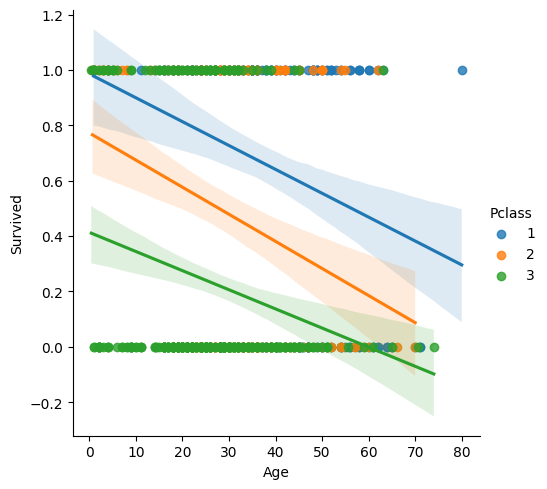

In [116]:
sns.lmplot(x='Age', y='Survived', hue='Pclass', data=titanic_df)

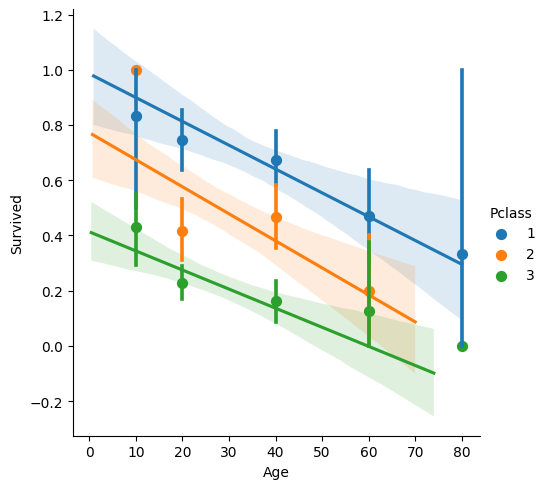

In [117]:
#To clean up the age data to give a clearer view;

generations = [10,20,40,60,80]

sns.lmplot(x='Age', y='Survived', hue='Pclass', data=titanic_df, x_bins=generations)

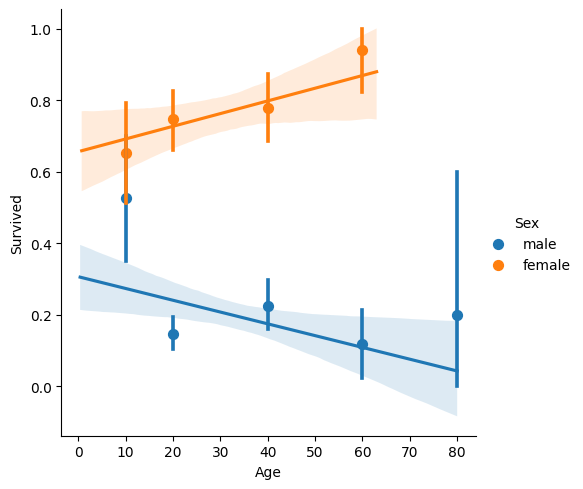

In [118]:
#To classify the ages of the survivors based on sex;

sns.lmplot(x='Age', y='Survived', hue='Sex', data=titanic_df, x_bins=generations)

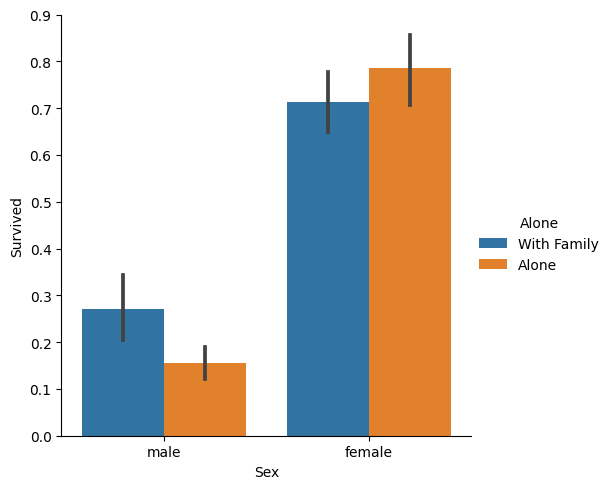

In [146]:
#To check if having a family member increased the rate of survival among passengers;

sns.catplot(x='Sex', y='Survived', data=titanic_df, hue='Alone', kind='bar')

In [147]:
#To determine the percentage of women that survived;

women = titanic_df.loc[titanic_df.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [149]:
#To determine the percentage of men that survived;

men = titanic_df.loc[titanic_df.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [150]:
#To determine the percentage of child that survived;

child = titanic_df.loc[titanic_df.person == 'child']["Survived"]
rate_child = sum(child)/len(child)

print("% of children who survived:", rate_child)

% of children who survived: 0.5903614457831325


In [53]:
#To determine the total number of women that survived;

women = titanic_df.loc[titanic_df.Sex == 'female']["Survived"]
rate_women = sum(women)

print("total number of women who survived:", rate_women)

total number of women who survived: 233


In [58]:
#To determine the total number of men that survived;

men = titanic_df.loc[titanic_df.Sex == 'male']["Survived"]
rate_men = sum(men)

print("total number of men who survived:", rate_men)

total number of men who survived: 109


In [56]:
#To determine the total number of children that survived;

child = titanic_df.loc[titanic_df.person == 'child']["Survived"]
rate_child = sum(child)

print("total number of children who survived:", rate_child)

total number of children who survived: 49
